# Publishing datasets to Foundry
3/17/21

This notebook serves as a quick walkthrough for publishing datasets via Foundry.

This code requires the newest version of Foundry (v0.0.7), if you're running locally, be sure you've updated the `foundry_ml` package


## Setup

In [ ]:
!pip install foundry_ml --upgrade
!pip install mdf_connect_client

Before publishing, you need join a Globus group so that you have the right permissions to publish to Foundry! [Join this group](https://app.globus.org/groups/cc192dca-3751-11e8-90c1-0a7c735d220a/about) to get started. Follow the 
prompts to get setup (and set up your Globus account, if you don't already
have one).

In [49]:
from foundry import Foundry

f = Foundry(no_browser=True, no_local_server=True)

## Arguments needed for publishing

This section describes and defines the variables for all of the possible arguments you could pass to `f.publish()`, for illustrative purposes.

### Metadata

The metadata describe the dataset inputs and outputs, along with the type of 
dataset (e.g. "tabular) and other relevant info. The metadata should meet the
schema defined [here](https://github.com/materials-data-facility/data-schemas/blob/master/schemas/projects.json#L111) under "foundry".

In [50]:
# load your metadata that describes your dataset. Could be manual dict like this, 
#   could be loaded from a file, etc.
example_iris_metadata = {
    "inputs":["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"],
    "input_descriptions":["sepal length in unit(cm)", "sepal width in unit(cm)", "petal length in unit(cm)", "petal width in unit(cm)"],
    "input_units":["cm","cm","cm","cm"],
    "outputs":["y"],
    "output_descriptions":["flower type"],
    "output_units":[],
    "output_labels":["setosa","versicolor", "virginica"],
    "short_name":"iris_example",
    "package_type":"tabular"
}

### Pointer to your dataset

In order to tell Foundry where to look for your dataset to publish, we currently
use Globus endpoints (where an "endpoint" is any data location, e.g. a remote 
server, your local computer, etc.). Make sure you have added yourself to a
Globus group in order to choose an endpoint. 

You may want to make your local machine an endpoint so you can directly upload
a dataset stored on your personal computer.

To add an endpoint, on the Globus page navigate to "Endpoints" and then click
the "Create a personal endpoint" link in the top right.

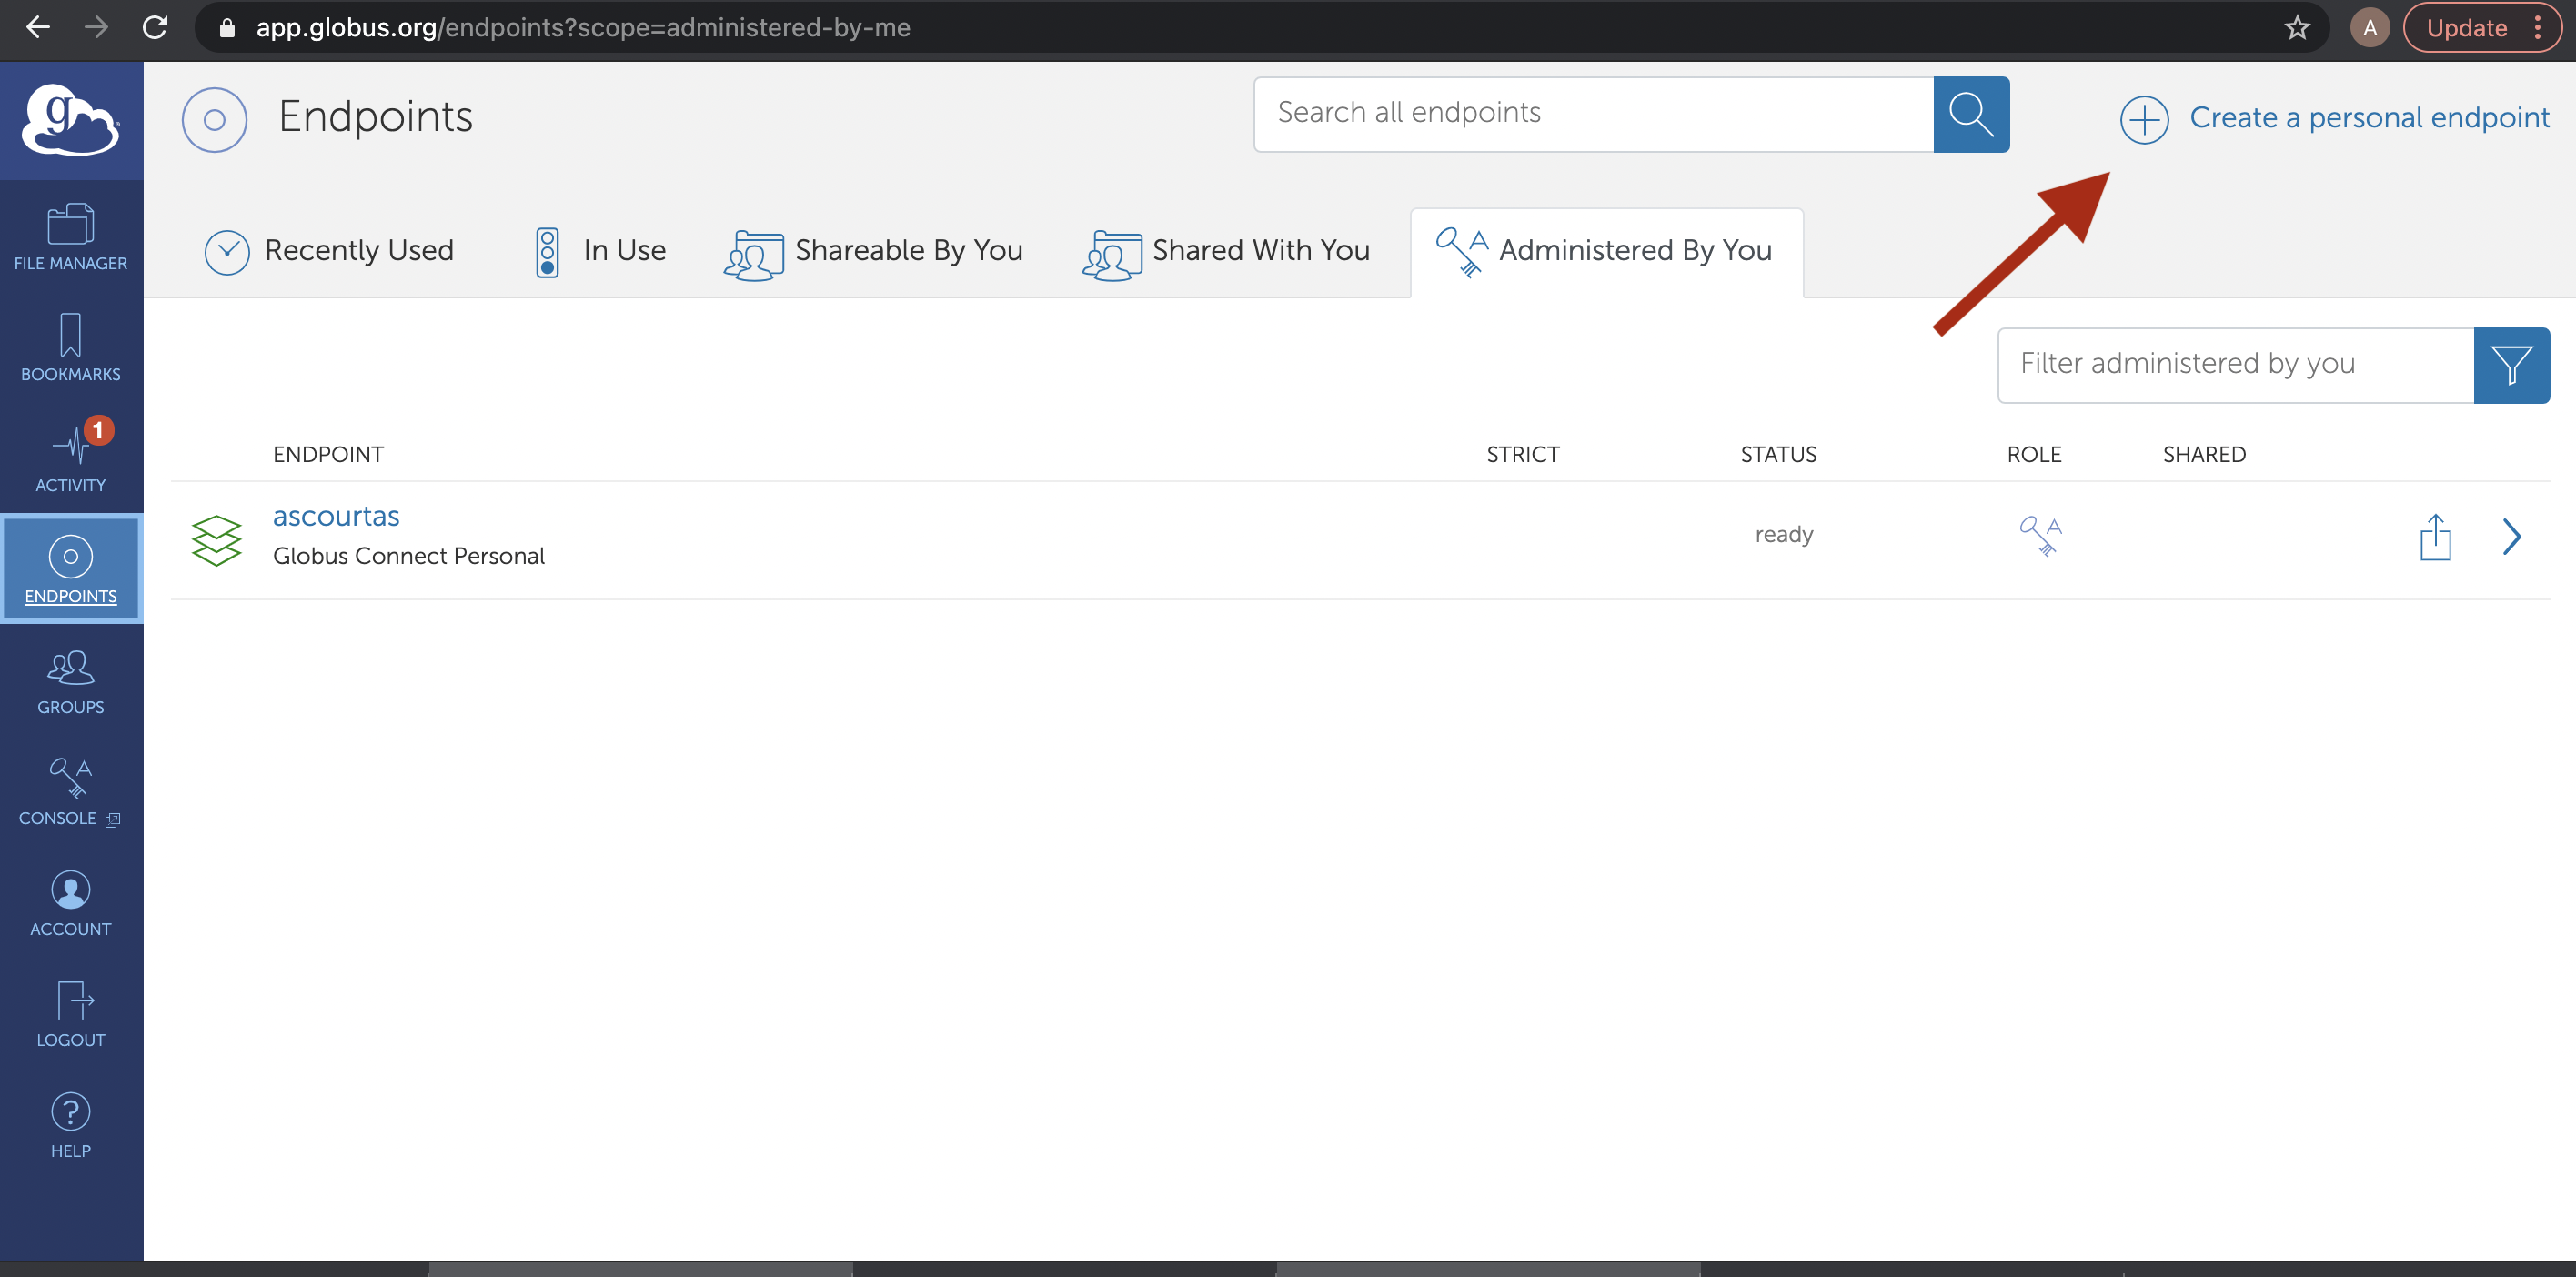

The URI for this endpoint is what we will pass to our `publish()` function via
`data_source`

In [51]:
# a Globus endpoint. In this example, I use a dataset on our temp
#   server. You can also make your local machine a Globus endpoint
data_source = "https://app.globus.org/file-manager?origin_id=e38ee745-6d04-11e5-ba46-22000b92c6ec&origin_path=%2Ffoundry%2F_test_blaiszik_foundry_iris_v1.2%2F"

### Other arguments

In [40]:
# full title of dataset
title = "Scourtas example iris dataset"

# authors to list 
authors = ["A Scourtas", "B Blaiszik"]

# shorthand title (optional)
short_name = "colab_example_AS_iris"

# affiliations of authors (optional)
# In the same order as authors list. If a different number of affiliations are 
#   given, all affiliations will be applied to all authors.
affiliations = ["Globus Labs, UChicago"]

# publisher of the data (optional)
# The default is MDF
publisher = "Materials Data Facility"

# publication year (optional)
# The default is the current calendar year
publication_year = 2021

We won't use all of these variables in our call to `f.publish()`, because many of the default values for the parameters (such as "MDF" for `publisher`) work well for our use case. 

However, the metadata, data source, title, and authors are all required.

## Publishing to Foundry

In [41]:
# publish to Foundry! returns a result object we can inspect
res = f.publish(example_iris_metadata, data_source, title, authors, short_name=short_name)

In [42]:
# check if publication request was valid
res['success']

True

We can inspect the entire `res` object for more detailed information

In [43]:
res

{'error': None,
 'source_id': '_test_colab_example_iris_v1.1',
 'status_code': 202,
 'success': True}

### When will my data package be available in Foundry?

We we can use the `source_id` of the `res` result to check the status of our submission. Ths `source_id` is a unique identifier based on the title and version of your data package.

In [45]:
source_id = res['source_id']
f.check_status(source_id=source_id)


Status of TEST submission _test_colab_example_iris_v1.1 (scourtas_colab_example_iris_publish)
Submitted by Aristana Scourtas at 2021-03-17T19:41:51.869694Z

Submission initialization has not started yet.
Cancellation of previous submissions has not started yet.
Connect data download has not started yet.
Data transfer to primary destination has not started yet.
Metadata extraction has not started yet.
Dataset curation has not started yet.
MDF Search ingestion has not started yet.
Data transfer to secondary destinations has not started yet.
MDF Publish publication has not started yet.
Citrine upload has not started yet.
Materials Resource Registration has not started yet.
Post-processing cleanup has not started yet.

This submission is still processing.



Success! The dataset is now in the curation phase, and needs to be approved by an admin/curator before publication. You can check back in on the status using the `check_status()` function at any time, just be sure to hang onto the `source_id`.

You can pass `short=True` to `check_status()` to print a short finished/processing message, which can beuseful for checking many datasets' status at once. Pass `raw=True` to get raw, full status result (default `False` is recommended).

### Updating or republishing a data package

To re-publish a dataset, pass `update=True` to `f.publish()`

In [48]:
# republishing same dataset -- note the version increments automatically
res = f.publish(example_iris_metadata, data_source, title, authors, short_name=short_name, update=True)
res

{'error': None,
 'source_id': '_test_colab_example_iris_v1.3',
 'status_code': 202,
 'success': True}

## Questions?

If you have any questions, please reach out to Aristana Scourtas (aristana [at] uchicago.edu), Ben Blaiszik (blaiszik [at] uchicago.edu), or KJ Schmidt (kjschmidt [at] uchicago.edu)